# Importing Libraries

In [1]:
from matplotlib.ticker import FuncFormatter
from pandas.io.json import json_normalize
from urllib.request import urlopen,Request
import time
from IPython.display import Image
import json
import locale
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
import sqlalchemy
import sqlite3
import csv
%matplotlib inline
from IPython.display import Image, HTML
import datetime
import ast
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor
#from wordcloud import WordCloud, STOPWORDS
#import plotly
#import plotly.plotly as py
#plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)


# Collecting and cleaning data sets

# Collecting

## Movies

In [3]:
def movies(directory, headers, api_key, stop, start, writing_mode):
    
    if not os.path.exists(directory):
        os.makedirs(directory)
        os.chdir(directory)
    else:
        os.chdir(directory)
    print(os.getcwd())
        
    while start < stop:
        response = requests.get('https://api.themoviedb.org/3/movie/' + str(start) + '?api_key=' + api_key)
        data = response.json()
        filtered_data = {k : v for k, v in filter(lambda t: t[0] in headers, data.items())}
        df = pd.DataFrame(filtered_data, index = [0])
                 
        with open('movies.csv', str(writing_mode)) as f:
            df.to_csv(f, header = False, sep = ',', encoding = 'utf-8')
        print(start)
        start += 1
        
    header_to_pass = ["idx"] + headers
    
    df = pd.read_csv(directory + 'movies.csv', header = None, names = header_to_pass, error_bad_lines = False)
    df.rename(columns={0: header_to_pass[0], 1: header_to_pass[1], 2: header_to_pass[2], 3: header_to_pass[3], 4: header_to_pass[4], 5: header_to_pass[5], 6: header_to_pass[6], 7: header_to_pass[7], 8: header_to_pass[8], 9: header_to_pass[9], 10: header_to_pass[10], 11: header_to_pass[11], 12: header_to_pass[12], 13: header_to_pass[13], 14: header_to_pass[14], 15: header_to_pass[15]}, inplace=True)
    df.to_csv(directory + '/backup/movies.csv', index = False)

    with open(directory + '/backup/movies.csv', 'r') as table:
        dr = csv.DictReader(table, delimiter = ',')
        to_db = [(i[header_to_pass[0]], i[header_to_pass[1]], i[header_to_pass[2]], i[header_to_pass[3]], i[header_to_pass[4]] , i[header_to_pass[5]], i[header_to_pass[6]], i[header_to_pass[7]], i[header_to_pass[8]], i[header_to_pass[9]], i[header_to_pass[10]], i[header_to_pass[11]], i[header_to_pass[12]], i[header_to_pass[13]], i[header_to_pass[14]], i[header_to_pass[15]] ) for i in dr]

        
    con = sqlite3.connect(directory + 'movies.sqlite')
    cursor = con.cursor()
    
    cursor.execute('''
    DROP TABLE IF EXISTS movies
    ''')
    con.commit()
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS movies(idx STR, budget INT, id STR, imdb_id STR, original_language STR, original_title STR, overview STR,
                  popularity FLOAT, poster_path STR, release_date DATE, revenue FLOAT, runtime INT, status STR, title STR, vote_average FLOAT, vote_count INT)
    ''')
    con.commit()
    
    cursor.executemany("INSERT INTO movies VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);", to_db)
    con.commit()
    con.close()


directory = '/home/konrad/movies/'
headers = ["budget", "id","imdb_id", "original_language", "original_title", "overview", "popularity", "poster_path", "release_date","revenue","runtime","status","title","vote_average","vote_count"]
api_key = 'e4f5b3b79e2ab374455c1c1e1d0ca014'
stop = 72500
start = 72500
writing_mode = 'a'

movies(directory, headers, api_key, stop, start, writing_mode)

/home/konrad/movies
72162
72163
72164
72165
72166
72167
72168
72169
72170
72171
72172
72173
72174
72175
72176
72177
72178
72179
72180
72181
72182
72183
72184
72185
72186
72187
72188
72189
72190
72191
72192
72193
72194
72195
72196
72197
72198
72199
72200
72201
72202
72203
72204
72205
72206
72207
72208
72209
72210
72211
72212
72213
72214
72215
72216
72217
72218
72219
72220
72221
72222
72223
72224
72225
72226
72227
72228
72229
72230
72231
72232
72233
72234
72235
72236
72237
72238
72239
72240
72241
72242
72243
72244
72245
72246
72247
72248
72249
72250
72251
72252
72253
72254
72255
72256
72257
72258
72259
72260
72261
72262
72263
72264
72265
72266
72267
72268
72269
72270
72271
72272
72273
72274
72275
72276
72277
72278
72279
72280
72281
72282
72283
72284
72285
72286
72287
72288
72289
72290
72291
72292
72293
72294
72295
72296
72297
72298
72299
72300
72301
72302
72303
72304
72305
72306
72307
72308
72309
72310
72311
72312
72313
72314
72315
72316
72317
72318
72319
72320
72321
72322
72323
72324
72

/home/konrad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


## Genres

In [2]:
def genres(directory, headers, api_key, stop, start, writing_mode):
    
    if not os.path.exists(directory):
        os.makedirs(directory)
        os.chdir(directory)
    else:
        os.chdir(directory)
    print(os.getcwd())
        
    while start < stop:
        response = requests.get('https://api.themoviedb.org/3/movie/' + str(start) +'?api_key=' +  api_key)
        data = response.json()
        
        if 'The resource you requested could not be found.' in data.values():
            start += 1
            
        else:            
            data_normalized = json_normalize(data, "genres", ["imdb_id"])
            df = pd.DataFrame(data_normalized, index = [0])
            
            with open('genres.csv', str(writing_mode)) as f:
                df.to_csv(f, header = False, sep = ',', encoding = 'utf-8')
            print(start)
            
        start += 1

    header_to_pass = ["idx"] + headers

    df = pd.read_csv(directory + 'genres.csv', header=None, names=header_to_pass, error_bad_lines=False)
    df.rename(columns={0: header_to_pass[0], 1: header_to_pass[1], 2: header_to_pass[2], 3: header_to_pass[3]}, inplace=True)
    df.to_csv(directory + '/backup/genres.csv', index=False)

    with open(directory + '/backup/genres.csv', 'r') as table:
        dr = csv.DictReader(table, delimiter=',')
        to_db = [(i[header_to_pass[0]], i[header_to_pass[1]], i[header_to_pass[2]], i[header_to_pass[3]]) for i in dr]

    
    con = sqlite3.connect(directory + 'movies.sqlite')
    cursor = con.cursor()
    
    cursor.execute('''
    DROP TABLE IF EXISTS genres
    ''')
    con.commit()

    cursor.execute('''
    CREATE TABLE IF NOT EXISTS genres(idx STR, id STR, name STR, imdb_id STR)
    ''')
    con.commit()

    cursor.executemany("INSERT INTO genres VALUES (?,?,?,?);", to_db)
    con.commit()
    con.close()
    

    
directory = '/home/konrad/movies/'
headers = ["id", "name", "imdb_id"]
api_key = '69d2d11ea34cd0ff95c454c73786a6a7'
stop = 72500
start = 72500
writing_mode = 'a'

genres(directory, headers, api_key, stop, start, writing_mode)

/home/konrad/movies
71937
71938
71941
71942
71943
71944
71945
71946
71947
71950
71951
71976
71977
71980
71983
71984
71985
71986
71987
71990
71991
71992
71993
71996
71997
71998
71999
72000
72003
72004
72005
72008
72009
72010
72011
72012
72013
72014
72015
72016
72017
72018
72019
72022
72023
72024
72025
72026
72027
72028
72029
72032
72033
72034
72035
72036
72037
72038
72039
72040
72043
72044
72045
72050
72051
72054
72057
72058
72059
72062
72063
72064
72067
72068
72069
72070
72071
72072
72073
72074
72075
72076
72077
72078
72079
72080
72081
72082
72083
72084
72087
72088
72091
72092
72093
72094
72095
72096
72097
72098
72099
72100
72101
72102
72103
72110
72111
72114
72115
72116
72117
72118
72121
72124
72127
72128
72131
72132
72133
72134
72135
72136
72137
72138
72139
72140
72143
72144
72145
72146
72151
72152
72153
72156
72157
72158
72161
72162
72163
72164
72165
72172
72175
72176
72177
72178
72179
72180
72181
72182
72183
72184
72185
72186
72187
72188
72189
72190
72193
72194
72197
72198
72199
72

## Production Countries

In [24]:
def productionCountries(directory, headers, api_key, stop, start, writing_mode):

    if not os.path.exists(directory):
        os.makedirs(directory)
        os.chdir(directory)
    else:
        os.chdir(directory)
    print(os.getcwd())
        
    while start < stop:
        response = requests.get('https://api.themoviedb.org/3/movie/'+ str(start) +'?api_key='+  api_key)
        data = response.json()
        
        if 'The resource you requested could not be found.' in data.values():
            start += 1
            
        else:
            data_normalized = json_normalize(data,"production_countries",["imdb_id"])
            df = pd.DataFrame(data_normalized, index = [0])

            with open('productioncountries.csv', str(writing_mode)) as f:
                df.to_csv(f, header = False, sep = ',', encoding = 'utf-8')
            print(start)
        
        start += 1

    df = pd.read_csv(directory + '/productioncountries.csv', header = None, names = headers, error_bad_lines = False)
    df.rename(columns={0: headers[0], 1: headers[1], 2: headers[2]}, inplace = True)
    df.to_csv(directory + 'backup/productioncountries.csv', index = False)

    with open(directory + '/backup/productioncountries.csv', 'r') as table:
        dr = csv.DictReader(table, delimiter = ',')
        to_db = [(i[headers[0]], i[headers[1]], i[headers[2]]) for i in dr]

    
    con = sqlite3.connect(directory + 'movies.sqlite')
    cursor = con.cursor()
    
    cursor.execute('''
    DROP TABLE IF EXISTS productioncountries
    ''')
    con.commit()
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS productioncountries(iso_3166_1 STR, name STR, imdb_id STR)
    ''')
    con.commit()
    
    cursor.executemany("INSERT INTO productioncountries VALUES (?,?,?);", to_db)
    con.commit()
    con.close()

directory = '/home/konrad/movies/'
headers = ["iso_3166_1", "name", "imdb_id"]
api_key = 'ab9bd0e209dd5c8bf42b028a63bc4e29'
stop = 199710
start = 199709
writing_mode = 'a'

productionCountries(directory, headers, api_key, stop, start, writing_mode)

/home/konrad/movies
199704
199705
199708
199709


##  Keywords

In [6]:
def keywords(directory, headers, api_key, stop, start, writing_mode):

    if not os.path.exists(directory):
        os.makedirs(directory)
        os.chdir(directory)
    else:
        os.chdir(directory)
    print(os.getcwd())
    
    con = sqlite3.connect(directory + 'movies.sqlite')
    cursor = con.cursor()
          
    df = pd.read_sql_query("SELECT imdb_id FROM (SELECT DISTINCT imdb_id FROM movies) WHERE imdb_id <> ''", con)
    l = df['imdb_id'].tolist()
    editedList = l[start:stop]

    for i in editedList:
        response = requests.get("https://api.themoviedb.org/3/movie/" + i + "/keywords?api_key=" + api_key)
        data = response.json()
        data_normalized = json_normalize(data, "keywords", ["id"], meta_prefix = "Movie.")
        df = pd.DataFrame(data_normalized)

        with open(directory + 'keywords.csv', str(writing_mode)) as f:
            df.to_csv(f, header = False, sep = ',', encoding = 'utf-8')
        print(start) 
        start += 1
        
    header_to_pass = ["idx"] + headers
    
    df = pd.read_csv(directory + 'keywords.csv', header = None, names = header_to_pass, error_bad_lines = False)
    df.rename(columns={0: header_to_pass[0], 1: header_to_pass[1], 2: header_to_pass[2]}, inplace = True)
    df.to_csv(directory + '/backup/keywords.csv', index = False)

    with open(directory + '/backup/keywords.csv','r') as table:
        dr = csv.DictReader(table, delimiter = ',')
        to_db = [(i[header_to_pass[0]], i[header_to_pass[1]], i[header_to_pass[2]]) for i in dr]
        
    
    cursor.execute('''
        DROP TABLE IF EXISTS keywords
    ''')
    con.commit()
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS keywords(idx STR, keywords STR, id STR)
    ''')
    con.commit()
    
    cursor.executemany("INSERT INTO keywords VALUES (?,?,?);", to_db)
    con.commit()
    con.close()
    

directory = '/home/konrad/movies/'
headers = ["keywords", "id"]
api_key = 'e4f5b3b79e2ab374455c1c1e1d0ca014'
stop = 75000
start = 29309
writing_mode = 'a'

keywords(directory, headers, api_key, stop, start, writing_mode)

/home/konrad/movies
29300
29301
29302
29303
29304
29305
29306
29307
29308


KeyboardInterrupt: 

## Cast

In [3]:
def cast(directory, headers, api_key, stop, start, writing_mode):

    if not os.path.exists(directory):
        os.makedirs(directory)
        os.chdir(directory)
    else:
        os.chdir(directory)
    print(os.getcwd())
    
    con = sqlite3.connect(directory + 'movies.sqlite')
    cursor = con.cursor()
    
    df = pd.read_sql_query("SELECT imdb_id FROM (SELECT DISTINCT imdb_id FROM movies) WHERE imdb_id <> ''", con)
    l = df['imdb_id'].tolist()
    editedList = l[start:stop]

    for i in editedList:
        response = requests.get("https://api.themoviedb.org/3/movie/" + i + "/casts?api_key=" + api_key)
        data = response.json()
        data_normalized = json_normalize(data, "cast", ["id"], meta_prefix = "Movie.")
        df = pd.DataFrame(data_normalized)

        with open(directory + 'cast.csv', str(writing_mode)) as f:
            df.to_csv(f, header = False, sep = ',', encoding = 'utf-8')
        
        print(start)    
        start += 1
        
    header_to_pass = ["idx"] + headers

    df = pd.read_csv(directory + 'cast.csv', header = None, names = header_to_pass, error_bad_lines = False)
    df.rename(columns = {0: header_to_pass[0], 1:  header_to_pass[1], 2:  header_to_pass[2], 3:  header_to_pass[3], 4:  header_to_pass[4], 5:  header_to_pass[5], 6:  header_to_pass[6], 7:  header_to_pass[7], 8:  header_to_pass[8], 9:  header_to_pass[9]}, inplace=True)
    df.to_csv(directory + '/backup/cast.csv', index = False)

    with open(directory + '/backup/cast.csv','r') as table:
        dr = csv.DictReader(table, delimiter = ',')
        to_db = [(i[header_to_pass[0]], i[header_to_pass[1]], i[header_to_pass[2]], i[header_to_pass[3]], i[header_to_pass[4]], i[header_to_pass[5]], i[header_to_pass[6]], i[header_to_pass[7]], i[header_to_pass[8]], i[header_to_pass[9]]) for i in dr]


    cursor.execute('''
        DROP TABLE IF EXISTS cast
    ''')
    con.commit()
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS cast(idx STR, cast_id STR, character STR, credit_id STR, gender STR, id STR, name STR, "Movie.order" STR, profile_path STR, "Movie.id" STR)
    ''')
    con.commit()
    
    cursor.executemany("INSERT INTO cast VALUES (?,?,?,?,?,?,?,?,?,?);", to_db)
    con.commit()
    con.close()
    
        

directory = '/home/konrad/movies/'
headers = ["cast_id", "character", "credit_id", "imgenderdb_id", "id", "name", "Movie.order", "profile_path", "Movie.id"]
api_key = 'ab9bd0e209dd5c8bf42b028a63bc4e29'
stop = 72500
start = 25212
writing_mode = 'a'

cast(directory, headers, api_key, stop, start, writing_mode)

/home/konrad/movies
25182
25183
25184
25185
25186
25187
25188
25189
25190
25191
25192
25193
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25205
25206
25207
25208
25209
25210
25211


KeyboardInterrupt: 

## Crew

In [11]:
def crew(directory, headers, api_key, stop, start, writing_mode):

    if not os.path.exists(directory):
        os.makedirs(directory)
        os.chdir(directory)
    else:
        os.chdir(directory)
    print(os.getcwd())
    
    con = sqlite3.connect(directory + 'movies.sqlite')
    cursor = con.cursor()
    
    df = pd.read_sql_query("SELECT imdb_id FROM (SELECT DISTINCT imdb_id FROM movies) WHERE imdb_id <> ''", con)
    l = df['imdb_id'].tolist()
    editedList = l[start:stop]

    for i in editedList:
        response = requests.get("https://api.themoviedb.org/3/movie/" + i + "/casts?api_key=" + api_key)
        data = response.json()
        data_normalized = json_normalize(data,"crew", ["id"], meta_prefix = "Movie.")
        df = pd.DataFrame(data_normalized)
                 
        with open('crew.csv', str(writing_mode)) as f:
            df.to_csv(f, header=False, sep=',', encoding='utf-8')
        
        print(start)    
        start += 1
        
    header_to_pass = ["idx"] + headers
    
    df = pd.read_csv(directory + 'crew.csv', header = None, names = header_to_pass, error_bad_lines = False)
    df.rename(columns = {0: header_to_pass[0], 1: header_to_pass[1] ,2: header_to_pass[2], 3: header_to_pass[3], 4: header_to_pass[4], 5: header_to_pass[5], 6: header_to_pass[6], 7: header_to_pass[7], 8: header_to_pass[8]}, inplace = True)
    df.to_csv(directory + '/backup/crew.csv', index = False)

    with open(directory + '/backup/crew.csv','r') as table:
        dr = csv.DictReader(table, delimiter=',')
        to_db = [(i[header_to_pass[0]], i[header_to_pass[1]], i[header_to_pass[2]], i[header_to_pass[3]], i[header_to_pass[4]], i[header_to_pass[5]], i[header_to_pass[6]], i[header_to_pass[7]], i[header_to_pass[8]]) for i in dr]

    
    cursor.execute('''
    DROP TABLE IF EXISTS crew
    ''')
    con.commit()
    
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS crew(idx STR, credit_id STR, department STR, gender STR, id STR, job STR, name STR, profile_path STR, "Movie.id" STR)
    ''')
    con.commit()
    
    cursor.executemany("INSERT INTO crew VALUES (?,?,?,?,?,?,?,?,?);", to_db)
    con.commit()
    
    

directory = '/home/konrad/movies/'
headers = ["credit_id", "department", "gender", "id", "job", "name", "profile_path", "Movie.id"]
api_key = '69d2d11ea34cd0ff95c454c73786a6a7'
stop = 72500
start = 25182
writing_mode = 'a'
        
crew(directory, headers, api_key, stop, start, writing_mode)

/home/konrad/movies


# Cleaning

Quering tables from movies.sqlite data base gives an information about empty rows and duplicate entries which have been pulled out during desining and testing of ETL process.

# Movies Dataset

In [2]:
con = sqlite3.connect('/home/konrad/movies/movies.sqlite')
c = con.cursor()

## Characteristics of Movie table before cleaning

Tha shape of Movies table:

In [10]:
pd.read_sql_query("SELECT * FROM movies;", con).shape

(1315886, 16)

Attributes of fields:

In [11]:
pd.read_sql_query("SELECT * FROM movies;", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315886 entries, 0 to 1315885
Data columns (total 16 columns):
idx                  1315886 non-null object
budget               1315886 non-null object
id                   1315886 non-null object
imdb_id              1315886 non-null object
original_language    1315886 non-null object
original_title       1315886 non-null object
overview             1315886 non-null object
popularity           1315886 non-null object
poster_path          1315886 non-null object
release_date         1315886 non-null object
revenue              1315886 non-null object
runtime              1315886 non-null object
status               1315886 non-null object
title                1315886 non-null object
vote_average         1315886 non-null object
vote_count           1315886 non-null object
dtypes: object(16)
memory usage: 160.6+ MB


Count of doubled entries due to quality of streamed data for ETL process:

In [66]:
pd.read_sql_query("SELECT imdb_id, COUNT(imdb_id) AS imdb_id_count FROM movies GROUP BY imdb_id ORDER BY imdb_id_count DESC;", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
imdb_id,,tt0436852,tt0416746,tt1585561,tt2061710,1942-07-20,2005-05-10,2009-08-20,2009-10-23,tt0000001
imdb_id_count,1204401,30093,20250,8729,4666,1,1,1,1,1


## Characteristics of Movie table after cleaning

Tha shape of Movies table:

In [50]:
pd.read_sql_query("SELECT DISTINCT * FROM movies WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')", con).shape

(47747, 16)

Attributes of fields:

In [49]:
pd.read_sql_query("SELECT DISTINCT * FROM movies WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47747 entries, 0 to 47746
Data columns (total 16 columns):
idx                  47747 non-null int64
budget               47747 non-null int64
id                   47747 non-null int64
imdb_id              47747 non-null object
original_language    47747 non-null object
original_title       47747 non-null object
overview             47747 non-null object
popularity           47747 non-null object
poster_path          47747 non-null object
release_date         47747 non-null object
revenue              47747 non-null object
runtime              47747 non-null object
status               47747 non-null object
title                47747 non-null object
vote_average         47747 non-null object
vote_count           47747 non-null object
dtypes: int64(3), object(13)
memory usage: 5.8+ MB


Transposing Movies table:

In [64]:
pd.read_sql_query("SELECT DISTINCT * FROM movies WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
idx,0,0,0,0,0,0,0,0,0,0
budget,0,0,4000000,21,42000,0,11000000,94000000,55000000,15000000
id,2,3,5,6,8,9,11,12,13,14
imdb_id,tt0094675,tt0092149,tt0113101,tt0107286,tt0825671,tt0425473,tt0076759,tt0266543,tt0109830,tt0169547
original_language,fi,fi,en,en,en,de,en,en,en,en
original_title,Ariel,Varjoja paratiisissa,Four Rooms,Judgment Night,Life in Loops (A Megacities RMX),Sonntag im August,Star Wars,Finding Nemo,Forrest Gump,American Beauty
overview,Taisto Kasurinen is a Finnish coal miner whose...,"An episode in the life of Nikander, a garbage ...",It's Ted the Bellhop's first night on the job....,"While racing to a boxing match, Frank, Mike, J...",Timo Novotny labels his new project an experim...,,Princess Leia is captured and held hostage by ...,"Nemo, an adventurous young clownfish, is unexp...",A man with a low IQ has accomplished great thi...,"Lester Burnham, a depressed suburban father in..."
popularity,5.603,3.789,9.823,6.935,0.6,0.952,33.015,25.552,23.149,18.132
poster_path,/gZCJZOn4l0Zj5hAxsMbxoS6CL0u.jpg,/lfaiYUVL7vPE57xgTscJN3kN5P1.jpg,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,/lNXmgUrP6h1nD53gkFh4WDzT6RZ.jpg,/8YyIjOAxwzD3fZMdmJrfiApod4l.jpg,,/btTdmkgIvOi0FFip1sPuZI2oQG6.jpg,/syPWyeeqzTQIxjIUaIFI7d0TyEY.jpg,/yE5d3BUhE8hCnkMUJOo1QDoOGNz.jpg,/3UBQGKS8c1dxRnDiu5kUK6ej3pP.jpg
release_date,1988-10-21,1986-10-17,1995-12-09,1993-10-15,2006-01-01,2004-09-02,1977-05-25,2003-05-30,1994-07-06,1999-09-15


In [34]:
pd.read_sql_query("SELECT DISTINCT * FROM movies WHERE imdb_id <> '' AND imdb_id NOT IN ('1942-07-20','2005-05-10','2009-08-20','2009-10-23')", con).tail(10).transpose()

,47737,47738,47739,47740,47741,47742,47743,47744,47745,47746
idx,0,0,0,0,0,0,0,0,0,0
budget,0,0,0,0,0,0,0,0,0,0
id,72489,72490,72491,72492,72494,72495,72496,72497,72498,72499
imdb_id,tt1161444,tt0201517,tt0078357,tt1822299,tt0075140,tt0022694,tt0012187,tt0010879,tt1978472,tt0390936
original_language,zh,ja,cs,en,de,de,en,en,zh,en
original_title,漂浪青春,カリスマ,Tajemství Ocelového mesta,Roy Chubby Brown: Too Fat To Be Gay,Der Richter und sein Henker,Das blaue Licht,Forbidden Fruit,When the Clouds Roll By,Er Duo Da You Fu,BlackJack: In the Money
overview,Three poetic tales of seeking the true identit...,A seasoned detective is called in to rescue a ...,The film is a metaphor for the Cold War. It de...,"Britain’s most outrageous comedian, bar none! ...",Hans Baerlach is a Swiss police detective who ...,"A young woman, Junta (Riefenstahl), lives apar...",Mary Maddock becomes a seamstress after her hu...,Daniel Boone Brown is a pleasure-seeking playb...,A middle-aged man sets out to find a new caree...,Jack uncovers a disturbing new plot in the uns...
popularity,0.614,0.6,1.266,0.6,0.947,0.6,1.4,0.762,0.6,0.6
poster_path,/2lg1RkYHnLE2IqeW6B5IxkYvw1J.jpg,/pUPdHFmGMHfNrPIDcde2DC6T7IZ.jpg,/xDaRigKgkFW0wDBZcP7Fyz80oQi.jpg,/yZhwSsMseS5zee9mUze7EBwgVM7.jpg,/4ClzOSeNcwcd8huBTyItHwGeeGg.jpg,/a6wuo9U0mzsw2Nma9nVg1NFlus3.jpg,/ofdYsFWBT3miJ5cMbAWhoWWWTnv.jpg,/u1fzrng8MHzGYTHksrZepW5Uw83.jpg,/IcylA7i4txYluuzjep0kSXSdf7.jpg,/gTB6GdCd91dvIix4w0OBzzfE2gC.jpg
release_date,2008-02-10,1999-11-10,1979-05-01,2009-11-09,1975-08-31,1932-03-24,1921-01-03,1919-12-28,2008-01-04,2005-09-11


# Genres Dataset

## Characteristics of Genres table before cleaning:
Tha shape of Genres table:

In [73]:
pd.read_sql_query("SELECT * FROM genres;", con).shape

(45381, 4)

Attributes of fields:

In [74]:
pd.read_sql_query("SELECT * FROM genres;", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45381 entries, 0 to 45380
Data columns (total 4 columns):
idx        45381 non-null int64
id         45381 non-null object
name       45381 non-null object
imdb_id    45381 non-null object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


Count of doubled entries due to quality of streamed data for ETL process:

In [75]:
pd.read_sql_query("SELECT imdb_id, COUNT(imdb_id) AS imdb_id_count FROM genres GROUP BY imdb_id ORDER BY imdb_id_count DESC;", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
imdb_id,,tt0022905,tt0023074,tt0023470,tt0024772,tt0024963,tt0026914,tt0027958,tt0033382,tt0034736
imdb_id_count,6901,2,2,2,2,2,2,2,2,2


## Basic characteristics of Genres table after cleaning

Tha shape of Movies table:

In [69]:
pd.read_sql_query("SELECT DISTINCT * FROM genres WHERE imdb_id <> '';", con).shape



(38428, 4)

Attributes of fields:

In [192]:
pd.read_sql_query("SELECT DISTINCT * FROM genres WHERE imdb_id <> '';", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38124 entries, 0 to 38123
Data columns (total 4 columns):
idx        38124 non-null int64
id         38124 non-null int64
name       38124 non-null object
imdb_id    38124 non-null object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


Transposing Movies table:

In [193]:
pd.read_sql_query("SELECT DISTINCT * FROM genres WHERE imdb_id <> '';", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
idx,0,0,0,0,0,0,0,0,0,0
id,18,18,28,18,16,35,18,9648,18,27
name,Drama,Drama,Action,Drama,Animation,Comedy,Drama,Mystery,Drama,Horror
imdb_id,tt0094675,tt0092149,tt0107286,tt0425473,tt0266543,tt0109830,tt0169547,tt0033467,tt0168629,tt0411267


In [68]:
pd.read_sql_query("SELECT DISTINCT * FROM genres WHERE imdb_id <> '';", con).tail(10).transpose()

,38418,38419,38420,38421,38422,38423,38424,38425,38426,38427
idx,0,0,0,0,0,0,0,0,0,0
id,18,35,18,18,18,35,9648,18,18,10749
name,Drama,Comedy,Drama,Drama,Drama,Comedy,Mystery,Drama,Drama,Romance
imdb_id,tt0120392,tt1754446,tt1161444,tt0201517,tt0078357,tt1822299,tt0075140,tt0022694,tt0012187,tt0010879


# Production Countries Dataset

## Characteristics of Production Countries table before cleaning:
Tha shape of Production Countries table:

In [76]:
pd.read_sql_query("SELECT * FROM productioncountries;", con).shape

(93440, 3)

Attributes of fields:

In [77]:
pd.read_sql_query("SELECT * FROM productioncountries;", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93440 entries, 0 to 93439
Data columns (total 3 columns):
iso_3166_1    93440 non-null object
name          93440 non-null object
imdb_id       93440 non-null object
dtypes: object(3)
memory usage: 2.1+ MB


Count of doubled entries due to quality of streamed data for ETL process:

In [78]:
pd.read_sql_query("SELECT imdb_id, COUNT(imdb_id) AS imdb_id_count FROM productioncountries GROUP BY imdb_id ORDER BY imdb_id_count DESC;", con).head()

,imdb_id,imdb_id_count
0,,31450
1,tt1947964,3
2,tt0058137,2
3,tt0087419,2
4,tt0096396,2


## Characteristics of Production Countries table after cleaning

The shape of Production Countries table:

In [79]:
pd.read_sql_query("SELECT DISTINCT * FROM productioncountries WHERE imdb_id <> ''", con).shape

(61972, 3)

Attributes of fields:

In [80]:
pd.read_sql_query("SELECT DISTINCT * FROM productioncountries WHERE imdb_id <> ''", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61972 entries, 0 to 61971
Data columns (total 3 columns):
iso_3166_1    61972 non-null object
name          61972 non-null object
imdb_id       61972 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


Transposing Production Countriestable:

In [81]:
pd.read_sql_query("SELECT DISTINCT * FROM productioncountries WHERE imdb_id <> ''", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
iso_3166_1,FI,FI,JP,DE,US,US,US,US,AR,DE
name,Finland,Finland,Japan,Germany,United States of America,United States of America,United States of America,United States of America,Argentina,Germany
imdb_id,tt0094675,tt0092149,tt0107286,tt0425473,tt0266543,tt0109830,tt0169547,tt0033467,tt0168629,tt0411267


In [82]:
pd.read_sql_query("SELECT DISTINCT * FROM productioncountries WHERE imdb_id <> ''", con).tail(10).transpose()

,61962,61963,61964,61965,61966,61967,61968,61969,61970,61971
iso_3166_1,US,US,AM,FR,HK,GB,BR,CN,BR,BR
name,United States of America,United States of America,Armenia,France,Hong Kong,United Kingdom,Brazil,China,Brazil,Brazil
imdb_id,tt1753433,tt0049807,tt1876373,tt1787743,tt2140559,tt0166075,tt2751084,tt2891008,tt0236492,tt0478860


# Cast Dataset

## Characteristics of Cast table before cleaning:
Tha shape of Cast table:

In [83]:
pd.read_sql_query("SELECT * FROM cast", con).shape

(360768, 10)

Attributes of fields:

In [84]:
pd.read_sql_query("SELECT * FROM cast", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360768 entries, 0 to 360767
Data columns (total 10 columns):
idx             360768 non-null int64
cast_id         360768 non-null int64
character       360768 non-null object
credit_id       360768 non-null object
gender          360768 non-null int64
id              360768 non-null int64
name            360768 non-null object
Movie.order     360768 non-null int64
profile_path    360768 non-null object
Movie.id        360768 non-null int64
dtypes: int64(6), object(4)
memory usage: 27.5+ MB


Number of missing IDs due to quality of data source:

In [207]:
pd.read_sql_query("SELECT Number of missing IDs due to quality of data source:COUNT('Movie.Id') as movie_id_count FROM cast WHERE 'Movie.id' ISNULL", con).head()

,movie_id_count
0,0


## Characteristics of Cast table after cleaning

Tha shape of Cast table:

In [87]:
pd.read_sql_query("SELECT DISTINCT * FROM cast WHERE 'Movie.id' NOT NULL", con).shape

(360488, 10)

Attributes of fields:

In [88]:
pd.read_sql_query("SELECT DISTINCT * FROM cast WHERE 'Movie.id' NOT NULL", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360488 entries, 0 to 360487
Data columns (total 10 columns):
idx             360488 non-null int64
cast_id         360488 non-null int64
character       360488 non-null object
credit_id       360488 non-null object
gender          360488 non-null int64
id              360488 non-null int64
name            360488 non-null object
Movie.order     360488 non-null int64
profile_path    360488 non-null object
Movie.id        360488 non-null int64
dtypes: int64(6), object(4)
memory usage: 27.5+ MB


Transposing Cast table:

In [89]:
pd.read_sql_query("SELECT DISTINCT * FROM cast WHERE 'Movie.id' NOT NULL", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
idx,0,1,2,3,0,1,2,3,4,5
cast_id,3,4,5,6,5,6,7,9,10,11
character,Taisto Olavi Kasurinen,Irmeli Katariina Pihlaja,Mikkonen,Riku,Nikander,Ilona Rajamäki,Melartin,Co-worker,Ilona's Girlfriend,Shop Steward
credit_id,52fe420dc3a36847f8000029,52fe420dc3a36847f800002d,52fe420dc3a36847f8000031,52fe420dc3a36847f8000035,52fe420dc3a36847f8000087,52fe420dc3a36847f800008b,52fe420dc3a36847f800008f,52fe420dc3a36847f8000099,52fe420dc3a36847f800009d,52fe420dc3a36847f80000a1
gender,2,1,2,2,2,1,2,2,1,2
id,54768,54769,4826,54770,4826,5999,4828,53508,1086499,222320
name,Turo Pajala,Susanna Haavisto,Matti Pellonpää,Eetu Hilkamo,Matti Pellonpää,Kati Outinen,Sakari Kuosmanen,Esko Nikkari,Kylli Köngäs,Pekka Laiho
Movie.order,0,1,2,3,0,1,2,3,4,5
profile_path,,,/7WuLvkuWphUAtW6QQwtF3WrwUKE.jpg,,/7WuLvkuWphUAtW6QQwtF3WrwUKE.jpg,/cjcuhAXRcg8C0VIDHtfz1BIVE3m.jpg,/fziy9WDgG5aW2fiKpK3kK0lfhuS.jpg,/mNiyD3BOzWba4CB0VTbIqA4EAVm.jpg,,/oLRsjrS3J9GMrPz6RsXCxhOJo9g.jpg
Movie.id,2,2,2,2,3,3,3,3,3,3


In [90]:
pd.read_sql_query("SELECT DISTINCT * FROM cast WHERE 'Movie.id' NOT NULL", con).tail(10).transpose()

,360478,360479,360480,360481,360482,360483,360484,360485,360486,360487
idx,0,0,1,0,1,2,3,4,5,6
cast_id,1,2,3,11,13,14,15,17,21,22
character,Band,,,Reiko Hatuna,Aya,Megumi Nonomura,Murakami,,Makoto Yoshioka,Hino
credit_id,52fe4599c3a36847f80d01f7,52fe4599c3a36847f80d0209,52fe4599c3a36847f80d020d,52fe4599c3a36847f80d0297,52fe4599c3a36847f80d029b,52fe4599c3a36847f80d029f,52fe4599c3a36847f80d02a3,52fe4599c3a36847f80d02a7,52fe4599c3a36847f80d02b7,52fe4599c3a36847f80d02bb
gender,0,2,2,1,2,0,2,1,2,2
id,446518,10557,64928,27778,13250,124128,124129,83528,80754,137029
name,Scorpions,Paul Simon,Art Garfunkel,Miki Nakatani,Hidetoshi Nishijima,Sawa Suzuki,Haruhiko Katô,Noriko Eguchi,Etsushi Toyokawa,Ren Osugi
Movie.order,0,0,1,0,2,3,4,6,7,8
profile_path,/1rJdRGE42nTJ7qfIBmF0qHNpirp.jpg,/tsExCQX0EcVfwIyx1SytyNcfnnO.jpg,/kGbVVEfv7e0O4SjXebP7NfUHXon.jpg,/qaRpv9GOkUX2ClscEGNJ9wdqwCZ.jpg,/e5F33DjoyFHyGHQnGibiO3VHKoy.jpg,/e6PRqtrIsPdngaC9sz84698ct3d.jpg,/e4GlKGndPkObAhsZv3NRcxnqczd.jpg,/rcweE3qyxPYQfugsR8hDgOE0ga6.jpg,/9izfePotl3iGNChoSDTNnDCbFKS.jpg,/AtITnpwCJXRxaO0K2kKcDYeef7o.jpg
Movie.id,40587,40589,40589,40592,40592,40592,40592,40592,40592,40592


# Crew Dataset

## Characteristics of Crew table before cleaning:
Tha shape of Crew table:

In [91]:
pd.read_sql_query("SELECT * FROM crew", con).shape

(344870, 9)

Attributes of fields:

In [92]:
pd.read_sql_query("SELECT * FROM crew", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344870 entries, 0 to 344869
Data columns (total 9 columns):
idx             344870 non-null object
credit_id       344870 non-null object
department      344870 non-null object
gender          344870 non-null object
id              344870 non-null object
job             344870 non-null object
name            344870 non-null object
profile_path    344870 non-null object
Movie.id        344870 non-null object
dtypes: object(9)
memory usage: 23.7+ MB


Number of missing IDs due to quality of data source:

In [215]:
pd.read_sql_query("SELECT COUNT('Movie.Id') as movie_id_count FROM crew WHERE 'Movie.id' ISNULL", con).head()

,movie_id_count
0,0


## Characteristics of Crew table after cleaning

Tha shape of Cast table:

In [93]:
pd.read_sql_query("SELECT DISTINCT * FROM crew WHERE 'Movie.id' NOT NULL", con).shape

(336449, 9)

Attributes of fields:

In [94]:
pd.read_sql_query("SELECT DISTINCT * FROM crew WHERE 'Movie.id' NOT NULL", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336449 entries, 0 to 336448
Data columns (total 9 columns):
idx             336449 non-null object
credit_id       336449 non-null object
department      336449 non-null object
gender          336449 non-null object
id              336449 non-null object
job             336449 non-null object
name            336449 non-null object
profile_path    336449 non-null object
Movie.id        336449 non-null object
dtypes: object(9)
memory usage: 23.1+ MB


Transposing Crew table:

In [219]:
pd.read_sql_query("SELECT DISTINCT * FROM crew WHERE 'Movie.id' NOT NULL", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
idx,0,1,2,3,4,5,6,0,1,2
credit_id,52fe420dc3a36847f800001f,52fe420dc3a36847f8000025,52fe420dc3a36847f800003b,52fe420dc3a36847f8000041,52fe420dc3a36847f8000047,52fe420dc3a36847f800004d,5be040dac3a3682b34043d42,52fe420dc3a36847f8000071,52fe420dc3a36847f8000077,52fe420dc3a36847f8000083
department,Writing,Directing,Camera,Editing,Art,Costume & Make-Up,Production,Directing,Writing,Editing
gender,2,2,2,1,2,1,2,2,2,1
id,16767,16767,16769,54766,53836,54771,16767,16767,16767,54766
job,Screenplay,Director,Director of Photography,Editor,Production Design,Costume Design,Producer,Director,Screenplay,Editor
name,Aki Kaurismäki,Aki Kaurismäki,Timo Salminen,Raija Talvio,Risto Karhula,Tuula Hilkamo,Aki Kaurismäki,Aki Kaurismäki,Aki Kaurismäki,Raija Talvio
profile_path,/rwwpC3H1rwLvSv7pIzAeII2aA2k.jpg,/rwwpC3H1rwLvSv7pIzAeII2aA2k.jpg,,,,,/rwwpC3H1rwLvSv7pIzAeII2aA2k.jpg,/rwwpC3H1rwLvSv7pIzAeII2aA2k.jpg,/rwwpC3H1rwLvSv7pIzAeII2aA2k.jpg,
Movie.id,2,2,2,2,2,2,2,3,3,3


In [95]:
pd.read_sql_query("SELECT DISTINCT * FROM crew WHERE 'Movie.id' NOT NULL", con).tail(10).transpose()

,336439,336440,336441,336442,336443,336444,336445,336446,336447,336448
idx,2,3,4,5,6,7,8,9,10,11
credit_id,52fe4599c3a36847f80d0269,52fe4599c3a36847f80d026f,52fe4599c3a36847f80d0275,52fe4599c3a36847f80d027b,52fe4599c3a36847f80d0281,52fe4599c3a36847f80d0287,52fe4599c3a36847f80d028d,52fe4599c3a36847f80d0293,52fe4599c3a36847f80d02ad,52fe4599c3a36847f80d02b3
department,Production,Production,Sound,Crew,Editing,Art,Sound,Lighting,Directing,Writing
gender,0,0,0,0,0,0,0,0,2,2
id,124123,124124,20326,124125,73685,124126,124127,115646,26882,26882
job,Executive Producer,Producer,Original Music Composer,Cinematography,Editor,Production Design,Sound Designer,Lighting Technician,Director,Screenplay
name,Satoshi Kanno,Atsuyuki Shimoda,Gary Ashiya,Akiko Ashizawa,Masahiro Ohnaga,Chie Matsumoto,Akira Fukada,Tatsuya Osada,Kiyoshi Kurosawa,Kiyoshi Kurosawa
profile_path,,,,/3ZwMjXu8W5TZIPA8A9R9P02ExH9.jpg,,,,,/fK7pieTcFLwQ07wdUi2Pms6BD95.jpg,/fK7pieTcFLwQ07wdUi2Pms6BD95.jpg
Movie.id,40592,40592,40592,40592,40592,40592,40592,40592,40592,40592


# Keywords Dataset

## Characteristics of Keywords table before cleaning:
Tha shape of Overview table:

In [108]:
pd.read_sql_query("SELECT * FROM keywords", con).shape

(121601, 3)

Attributes of fields:

In [97]:
pd.read_sql_query("SELECT * FROM keywords", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121601 entries, 0 to 121600
Data columns (total 3 columns):
idx         121601 non-null int64
keywords    121601 non-null object
id          121601 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


Number of missing ids due to quality of data source:

In [98]:
pd.read_sql_query("SELECT COUNT(id) as id_count FROM keywords WHERE id IN ('')", con).head()

,id_count
0,0


## Characteristics of Keywors table after cleaning

Tha shape of Keywords table:

In [99]:
pd.read_sql_query("SELECT DISTINCT * FROM keywords WHERE id <> ('') AND keywords <> ('')", con).shape

(121315, 3)

Attributes of fields:

In [100]:
pd.read_sql_query("SELECT DISTINCT * FROM keywords WHERE id <> ('') AND keywords <> ('')", con).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121315 entries, 0 to 121314
Data columns (total 3 columns):
idx         121315 non-null int64
keywords    121315 non-null object
id          121315 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


Transposing Keywords table:

In [110]:
pd.read_sql_query("SELECT DISTINCT * FROM keywords WHERE id <> ('') AND keywords <> ('') ORDER BY id;", con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
idx,1361,1787,3700,10183,612,613,616,622,922,2700
keywords,salesclerk,helsinki,garbage,independent film,hotel,new year's eve,witch,bet,hotel room,sperm
id,3,3,3,3,5,5,5,5,5,5


In [111]:
pd.read_sql_query("SELECT DISTINCT * FROM keywords WHERE id <> ('') AND keywords <> ('');", con).tail(10).transpose()

,121305,121306,121307,121308,121309,121310,121311,121312,121313,121314
idx,9887,13065,14605,1956,2444,2652,13014,188266,207883,241982
keywords,surrealism,soldier,helicopter pilot,world war ii,jewish ghetto,nazi,orphan,starvation,1940s,children in wartime
id,45612,45612,45612,45614,45614,45614,45614,45614,45614,45614


## Custom Rating

The value of X percentile for given distribution of vote_count:

In [112]:
percentile = 90

Computing the value of cutoff

In [115]:
pd.read_sql_query("SELECT vote_count AS vote_count_" + str(percentile) + "_percentile FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) ORDER BY vote_count ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) * " + str(percentile) + " / 100 - 1;", con)

,vote_count_90_percentile
0,139


Head 10 transposed

In [116]:
pd.read_sql_query("SELECT * FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) WHERE vote_count > (SELECT vote_count AS vote_count_" + str(percentile) + "_percentile FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) ORDER BY vote_count ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) * " + str(percentile) + " / 100 - 1) ORDER BY vote_count ASC;" , con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
idx,0,0,0,0,0,0,0,0,0,0
budget,8000000,0,58000000,0,21000000,0,2800000,0,0,4000000
id,400,1721,2148,2517,10606,11223,11305,13691,15251,16873
imdb_id,tt0114660,tt0069095,tt0087089,tt0408664,tt0087910,tt0077355,tt0097940,tt0323642,tt0085474,tt0858486
original_language,en,it,en,ja,en,en,en,en,en,en
original_title,Things to Do in Denver When You're Dead,...più forte ragazzi!,The Cotton Club,誰も知らない,The Philadelphia Experiment,Coma,Mystery Train,Piglet's Big Movie,Eddie Murphy: Delirious,Battle for Terra
overview,A mafia film in Tarantino style with a star-st...,"The ""Trinity"" crew makes another modern era fi...",The story of the people that frequented Harlem...,"In a small Tokyo apartment, twelve-year-old Ak...","Based on an ""actual event"" that took place in ...",A young woman doctor discovers something sinis...,"A seedy hotel in Memphis, Tennessee, provides ...",When the gang from the Hundred Acre Wood begin...,Taped live and in concert at Constitution Hall...,"A peaceful alien planet faces annihilation, as..."
popularity,5.734,6.233,6.011,5.642,5.025,5.648,3.967,4.932,5.233,5.119
poster_path,/ysKIolKO0376Nl5DV1fDAAPudEq.jpg,/hfra5i11GjZf0pdwseA2OUDZkR5.jpg,/qigf5fWSH1tw7z424UVKg71UIOS.jpg,/kDQSwhkiHttHt0OlPNdmnrBsTki.jpg,/4J0n9oFLfdkcCA86bXCnViJKxzd.jpg,/wXhYCwf7yhnvlJxhl8nIcSWb4Aw.jpg,/vcr6pBGeHWfjiWH6HarEEXdJIlG.jpg,/gM4rWSXfPMeXorIKXNr5kuxLPkz.jpg,/nopK3L1aJYCuEiSQTqwpZD7uff7.jpg,/hE71YvRdNaILXxPf0iASqqFTCSv.jpg
release_date,1995-12-01,1972-12-22,1984-12-14,2004-08-07,1984-08-03,1978-01-06,1989-09-06,2003-03-16,1983-08-17,2007-09-06


Tail 10 transposed

In [117]:
pd.read_sql_query("SELECT * FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) WHERE vote_count > (SELECT vote_count AS vote_count_" + str(percentile) + "_percentile FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) ORDER BY vote_count ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) * " + str(percentile) + " / 100 - 1) ORDER BY vote_count ASC;" , con).tail(10).transpose()

,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773
idx,0,0,0,0,0,0,0,0,0,0
budget,100000000,63000000,237000000,185000000,220000000,160000000,0,0,0,0
id,68718,550,19995,155,24428,27205,28102,52141,64659,67334
imdb_id,tt1853728,tt0137523,tt0499549,tt0468569,tt0848228,tt1375666,tt2061710,tt1585561,tt0416746,tt0436852
original_language,en,en,en,en,en,en,en,de,en,de
original_title,Django Unchained,Fight Club,Avatar,The Dark Knight,The Avengers,Inception,Ilse DeLange: Live In Ahoy,Die Fantastischen Vier: Heimspiel,Food Will Win the War,True Love
overview,"With the help of a German bounty hunter, a fre...",A ticking-time-bomb insomniac and a slippery s...,"In the 22nd century, a paraplegic Marine is di...",Batman raises the stakes in his war on crime. ...,When an unexpected enemy emerges and threatens...,"Cobb, a skilled thief who commits corporate es...",Tracklisting:,Tracklisting:,World War II propaganda film on the importance...,Seven short stories about growing up gay in Am...
popularity,20.567,33.581,32.934,36.251,49.011,35.524,,,,
poster_path,/5WJnxuw41sddupf8cwOxYftuvJG.jpg,/adw6Lq9FiC9zjYEpOqfq03ituwp.jpg,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,/1hRoyzDtpgMU7Dz4JF22RANzQO7.jpg,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,/qmDpIHrmpJINaRKAfWQfftjCdyi.jpg,,,,
release_date,2012-12-25,1999-10-15,2009-12-10,2008-07-16,2012-04-25,2010-07-15,,,,


Computing Global Average

In [118]:
pd.read_sql_query("SELECT AVG(vote_average) as vote_average_global FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'));" , con)

,vote_average_global
0,5.368855


Setting minimum size of vote_count

In [119]:
MinimumVotes = 250.0

Computing Score

Head 10 transposed

In [120]:
pd.read_sql_query("SELECT id, imdb_id, title, vote_count, vote_average, (vote_count / (vote_count + MinimumVotes) * vote_average) + (MinimumVotes / (vote_count + MinimumVotes * VoteAvarageGlobal)) AS Score FROM (SELECT id, imdb_id, title, vote_count, " + str(MinimumVotes) + " as MinimumVotes, vote_average, (SELECT AVG(vote_average) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) AS VoteAvarageGlobal FROM (SELECT * FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id <> '') WHERE vote_count > (SELECT vote_count AS vote_count_" + str(percentile) + "_percentile FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) ORDER BY vote_count ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) * " + str(percentile) + " / 100 - 1) ORDER BY vote_count ASC)) as ParametersForScore ORDER BY Score DESC;" , con).head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,278,238,155,550,680,13,122,424,129,120
imdb_id,tt0111161,tt0068646,tt0468569,tt0137523,tt0110912,tt0109830,tt0167260,tt0108052,tt0245429,tt0120737
title,The Shawshank Redemption,The Godfather,The Dark Knight,Fight Club,Pulp Fiction,Forrest Gump,The Lord of the Rings: The Return of the King,Schindler's List,Spirited Away,The Lord of the Rings: The Fellowship of the Ring
vote_count,11809,9032,17273,14746,13582,13098,11955,7040,6546,13126
vote_average,8.6,8.6,8.4,8.4,8.4,8.4,8.4,8.5,8.5,8.3
Score,8.44072,8.39247,8.29359,8.2755,8.26493,8.25999,8.24674,8.23833,8.21901,8.16215


Tail 10 transposed

In [121]:
pd.read_sql_query("SELECT id, imdb_id, title, vote_count, vote_average, (vote_count / (vote_count + MinimumVotes) * vote_average) + (MinimumVotes / (vote_count + MinimumVotes * VoteAvarageGlobal)) AS Score FROM (SELECT id, imdb_id, title, vote_count, " + str(MinimumVotes) + " as MinimumVotes, vote_average, (SELECT AVG(vote_average) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) AS VoteAvarageGlobal FROM (SELECT * FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) WHERE vote_count > (SELECT vote_count AS vote_count_" + str(percentile) + "_percentile FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23')) ORDER BY vote_count ASC LIMIT 1 OFFSET (SELECT COUNT(*) FROM (SELECT DISTINCT * FROM MOVIES WHERE imdb_id NOT IN ('','1942-07-20','2005-05-10','2009-08-20','2009-10-23'))) * " + str(percentile) + " / 100 - 1) ORDER BY vote_count ASC)) as ParametersForScore ORDER BY Score DESC;" , con).tail(10).transpose()

,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773
id,8046,26914,17711,10870,9544,11059,28102,52141,64659,67334
imdb_id,tt0299930,tt0105643,tt0131704,tt0368668,tt0295254,tt0317676,tt2061710,tt1585561,tt0416746,tt0436852
title,Gigli,Troll 2,The Adventures of Rocky & Bullwinkle,Lucky Luke and the Daltons,FearDotCom,House of the Dead,,,,
vote_count,171,156,149,142,147,151,,,,
vote_average,3.6,3.8,3.9,3.9,3.4,2.9,,,,
Score,1.62744,1.62696,1.62404,1.58119,1.42682,1.25944,0.186259,0.186259,0.186259,0.186259


## Text Mining

Big Data? Aaaaand it is done...

In [3]:
overview_table = pd.read_sql_query("SELECT DISTINCT imdb_id, title, overview FROM Movies WHERE overview <> ''", con)
overview_table.head

<bound method NDFrame.head of          imdb_id                                              title  \
0      tt0094675                                              Ariel   
1      tt0092149                                Shadows in Paradise   
2      tt0113101                                         Four Rooms   
3      tt0107286                                     Judgment Night   
4      tt0825671                   Life in Loops (A Megacities RMX)   
5      tt0076759                                          Star Wars   
6      tt0266543                                       Finding Nemo   
7      tt0109830                                       Forrest Gump   
8      tt0169547                                    American Beauty   
9      tt0033467                                       Citizen Kane   
10     tt0168629                                 Dancer in the Dark   
11     tt0411267                                           The Dark   
12     tt0119116                               

In [4]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
overview_table['overview'] = overview_table['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(overview_table['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(49888, 100802)

In [5]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

start_time = time.time()
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("--- %s seconds ---" % (time.time() - start_time))

print(cosine_sim)

--- 189.538756608963 seconds ---
[[1.         0.01459948 0.         ... 0.0083404  0.01030249 0.0180903 ]
 [0.01459948 1.         0.         ... 0.         0.01452813 0.        ]
 [0.         0.         1.         ... 0.         0.01014579 0.        ]
 ...
 [0.0083404  0.         0.         ... 1.         0.0140623  0.01519435]
 [0.01030249 0.01452813 0.01014579 ... 0.0140623  1.         0.00773665]
 [0.0180903  0.         0.         ... 0.01519435 0.00773665 1.        ]]


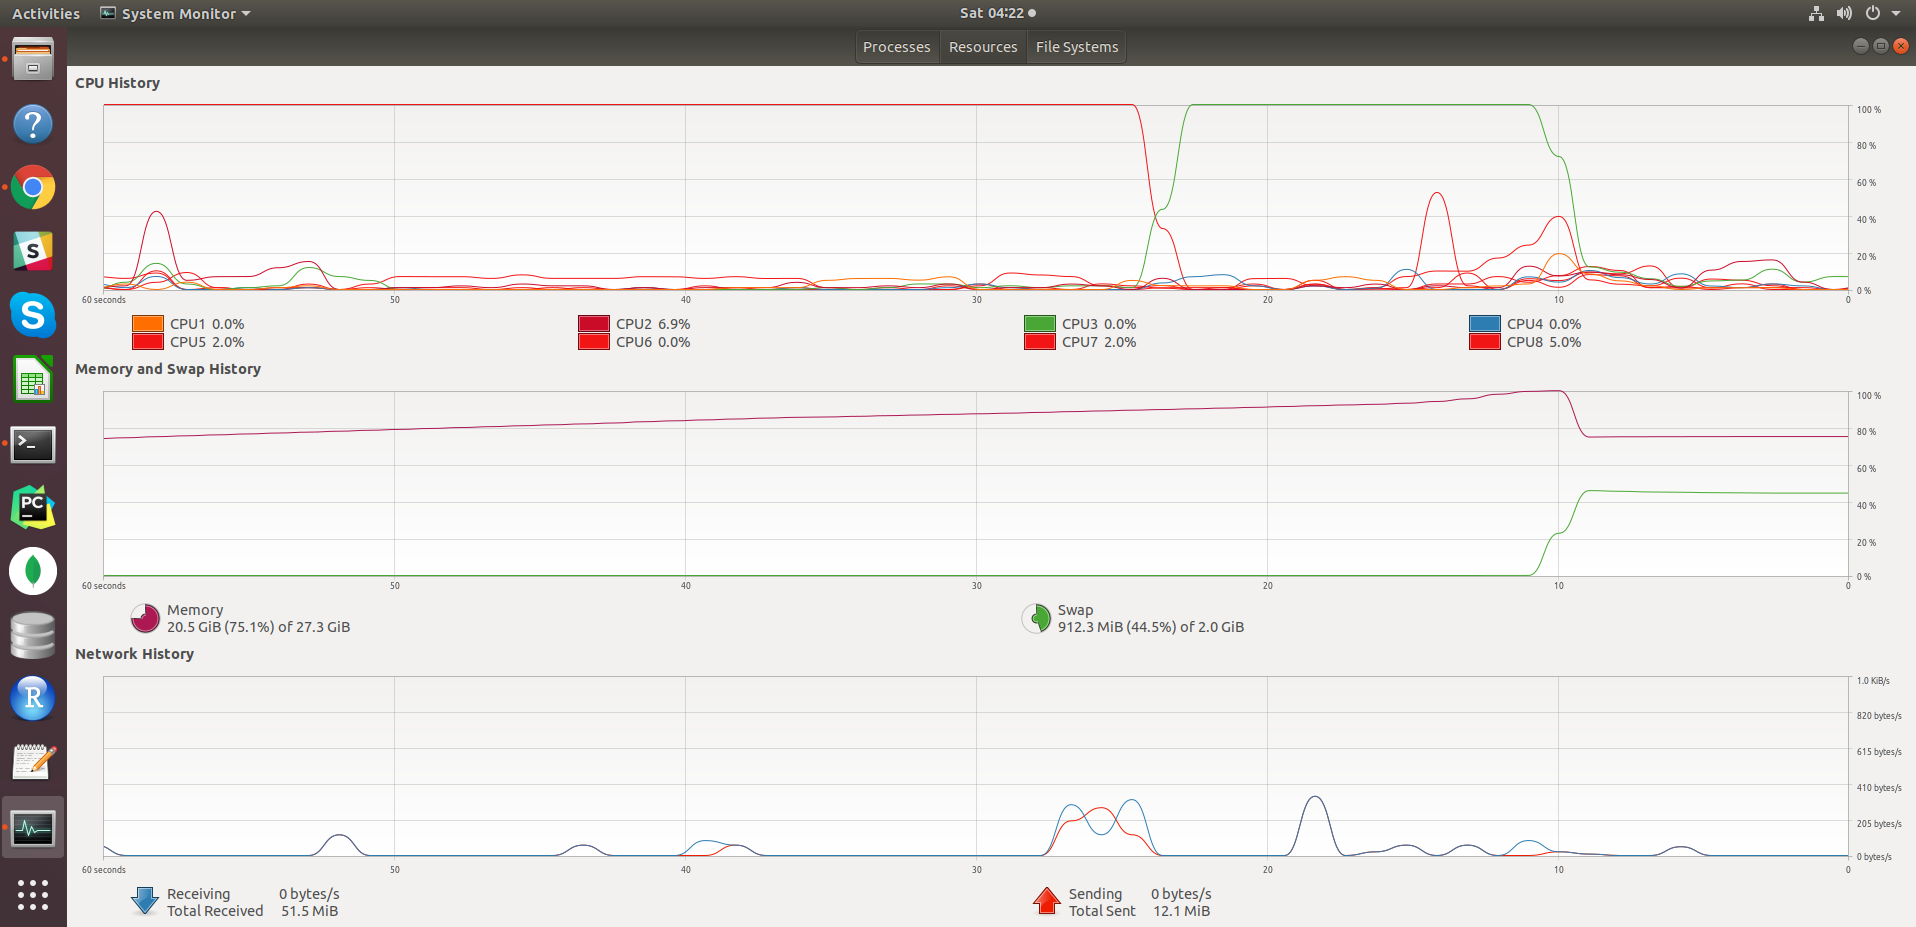

In [10]:
PATH = "/home/konrad/Pictures/"
Image(filename = PATH + "Screenshot from 2019-01-05 04-22-31.png", width=100, height=100)

In [6]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(overview_table.index, index=overview_table['title']).drop_duplicates()
indices.head

<bound method NDFrame.head of title
Ariel                                                             0
Shadows in Paradise                                               1
Four Rooms                                                        2
Judgment Night                                                    3
Life in Loops (A Megacities RMX)                                  4
Star Wars                                                         5
Finding Nemo                                                      6
Forrest Gump                                                      7
American Beauty                                                   8
Citizen Kane                                                      9
Dancer in the Dark                                               10
The Dark                                                         11
The Fifth Element                                                12
Metropolis                                                       13
My Life With

In [7]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return overview_table['title'].iloc[movie_indices]

In [8]:
get_recommendations('Short Circuit')

1734          Short Circuit
11946         Robot Stories
20018      Making Mr. Right
29850    Eve of Destruction
10178            Omega Doom
3099            Star Virgin
2131           Robot Wrecks
19321            R.O.T.O.R.
1582       Bicentennial Man
16437     Exterminator City
44018              Robotrix
Name: title, dtype: object